### Problem Statement
The wine industry in Italy faces challenges in understanding the chemical compositions of wines derived from different cultivars. With a dataset containing the chemical analysis of wines, the objective is to explore patterns and relationships in the data using unsupervised learning techniques. By clustering or analyzing the attributes, we aim to identify natural groupings of wines, which may correspond to underlying similarities in chemical composition or production techniques.

This analysis can help winemakers, researchers, and consumers better understand wine characteristics, optimize production, and tailor marketing strategies to specific wine profiles.

---

### Data Description
The dataset contains measurements of 13 chemical properties for wines grown in the same region in Italy but derived from three different cultivars. The dataset excludes the target variable (wine type) to focus on unsupervised learning.

#### Attributes:
1. **Alcohol**: Alcohol content in the wine.
2. **Malic acid**: A type of organic acid present in the wine.
3. **Ash**: Residual matter from the wine's mineral content.
4. **Alcalinity of ash**: Measures the alkaline components in ash.
5. **Magnesium**: Concentration of magnesium, a vital mineral.
6. **Total phenols**: Total phenolic compounds contributing to the wine's flavor and antioxidant properties.
7. **Flavanoids**: A subclass of phenolic compounds affecting taste and color.
8. **Nonflavanoid phenols**: Phenols other than flavanoids.
9. **Proanthocyanins**: A type of tannin contributing to astringency and color stability.
10. **Color intensity**: Perceived depth of color in the wine.
11. **Hue**: Color shade or tint of the wine.
12. **OD280/OD315 of diluted wines**: Optical density ratio, indicative of phenolic content.
13. **Proline**: An amino acid influencing aroma and quality.

---

#### Objective:
Use clustering or dimensionality reduction techniques to uncover natural groupings or patterns in the dataset. This can aid in identifying similarities between wines without prior knowledge of their type or cultivar.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer,kelbow_visualizer
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [4]:
data.shape

(178, 13)

In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<Axes: xlabel='Magnesium'>

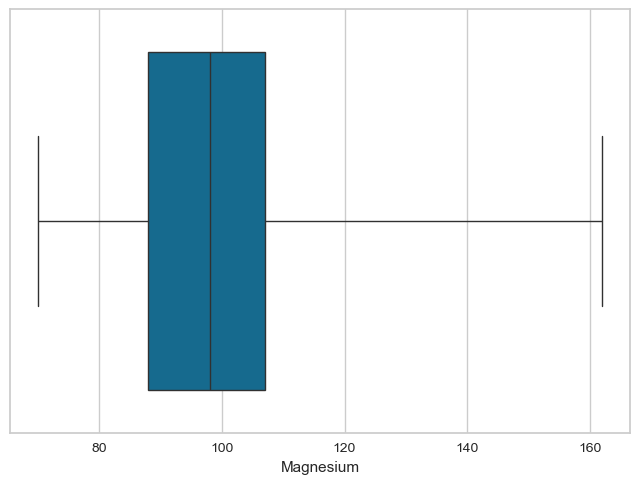

In [8]:
sns.boxplot(data=data,x='Magnesium',whis=3)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
# scaling of data
scaler=StandardScaler()
data_s=pd.DataFrame(scaler.fit_transform(data),columns=data.columns,index=data.index)
data_s.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## PCA (Dimension Reduction)

In [11]:
len(data.columns)

13

In [12]:
pca=PCA(n_components=13)
pca.fit(data_s)

PCA(n_components=13)

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

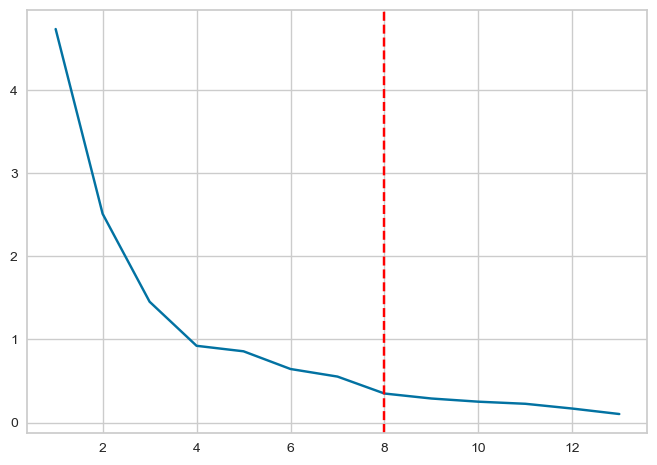

In [14]:
# scree plot
plt.plot(range(1,14),pca.explained_variance_)
plt.axvline(8,linestyle='--',color='red')
plt.show()

In [15]:
pca_final=PCA(n_components=8)
pca_final.fit(data_s)

PCA(n_components=8)

In [16]:
pca_data=pd.DataFrame(pca_final.fit_transform(data_s),columns=range(1,9))
pca_data.head()

,1,2,3,4,5,6,7,8
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700


# K-Means Clustering

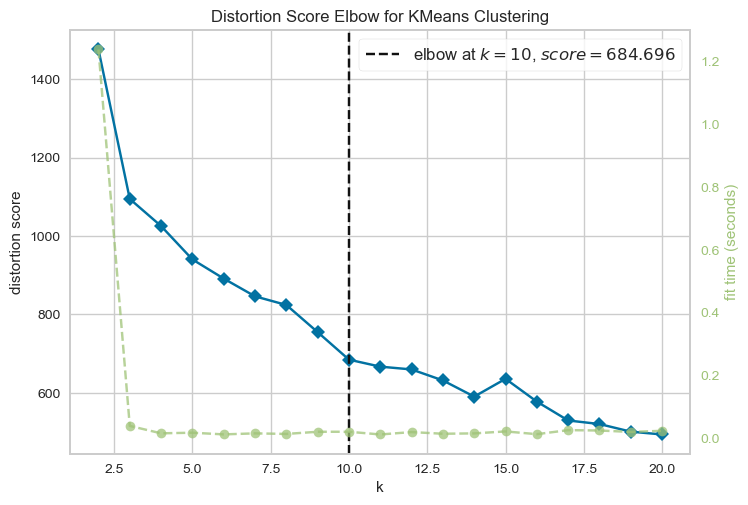

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=20), k=20)

In [17]:
kelbow_visualizer(model=KMeans(),k=20,X=pca_data)

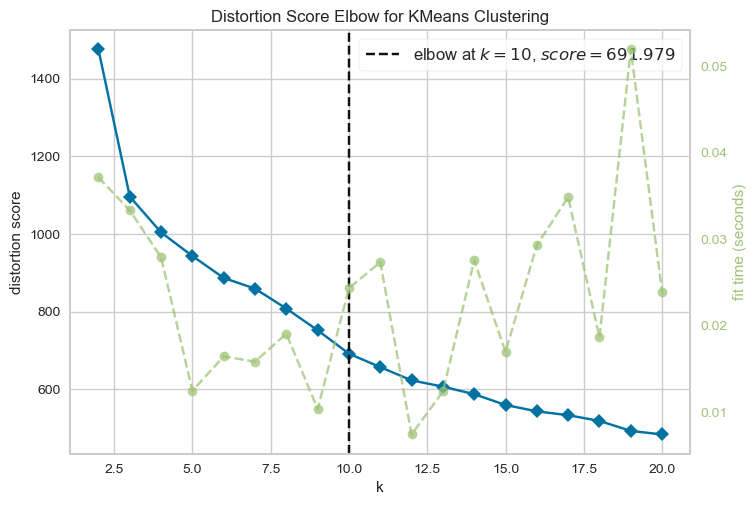

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=20, random_state=2), k=20)

In [18]:
kelbow_visualizer(model=KMeans(random_state=2),k=20,X=pca_data)

In [19]:
wcss=[]
for i in range(1,21):
    model=KMeans(n_clusters=i)
    model.fit(pca_data)
    wcss.append(model.inertia_)
wcss

[2129.285976161178,
 1474.4535480043362,
 1096.5964725622825,
 1004.3769815461853,
 972.8304383086034,
 892.6256324874769,
 836.1455572019404,
 771.5022138318495,
 718.5000462188016,
 700.6765217852001,
 657.5478128414848,
 643.1865159994053,
 637.6637581230127,
 591.8381611015421,
 563.8613133487855,
 556.7480738691011,
 536.1569158582724,
 502.48403312079705,
 495.45072861083554,
 529.5078693889652]

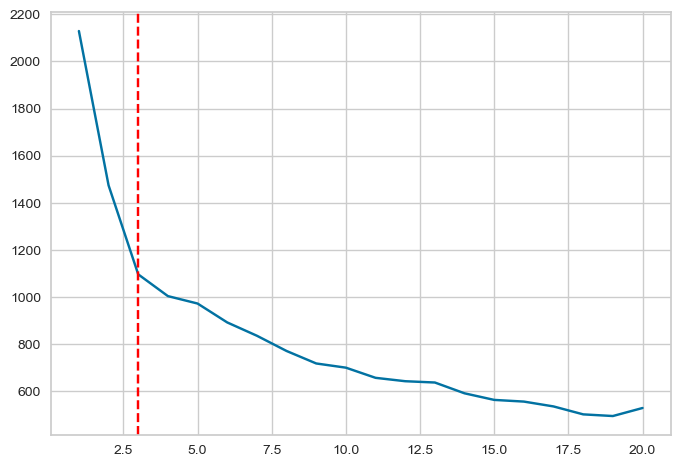

In [20]:
plt.plot(range(1,21),wcss)
plt.axvline(3,linestyle='--',color='red')
plt.show()

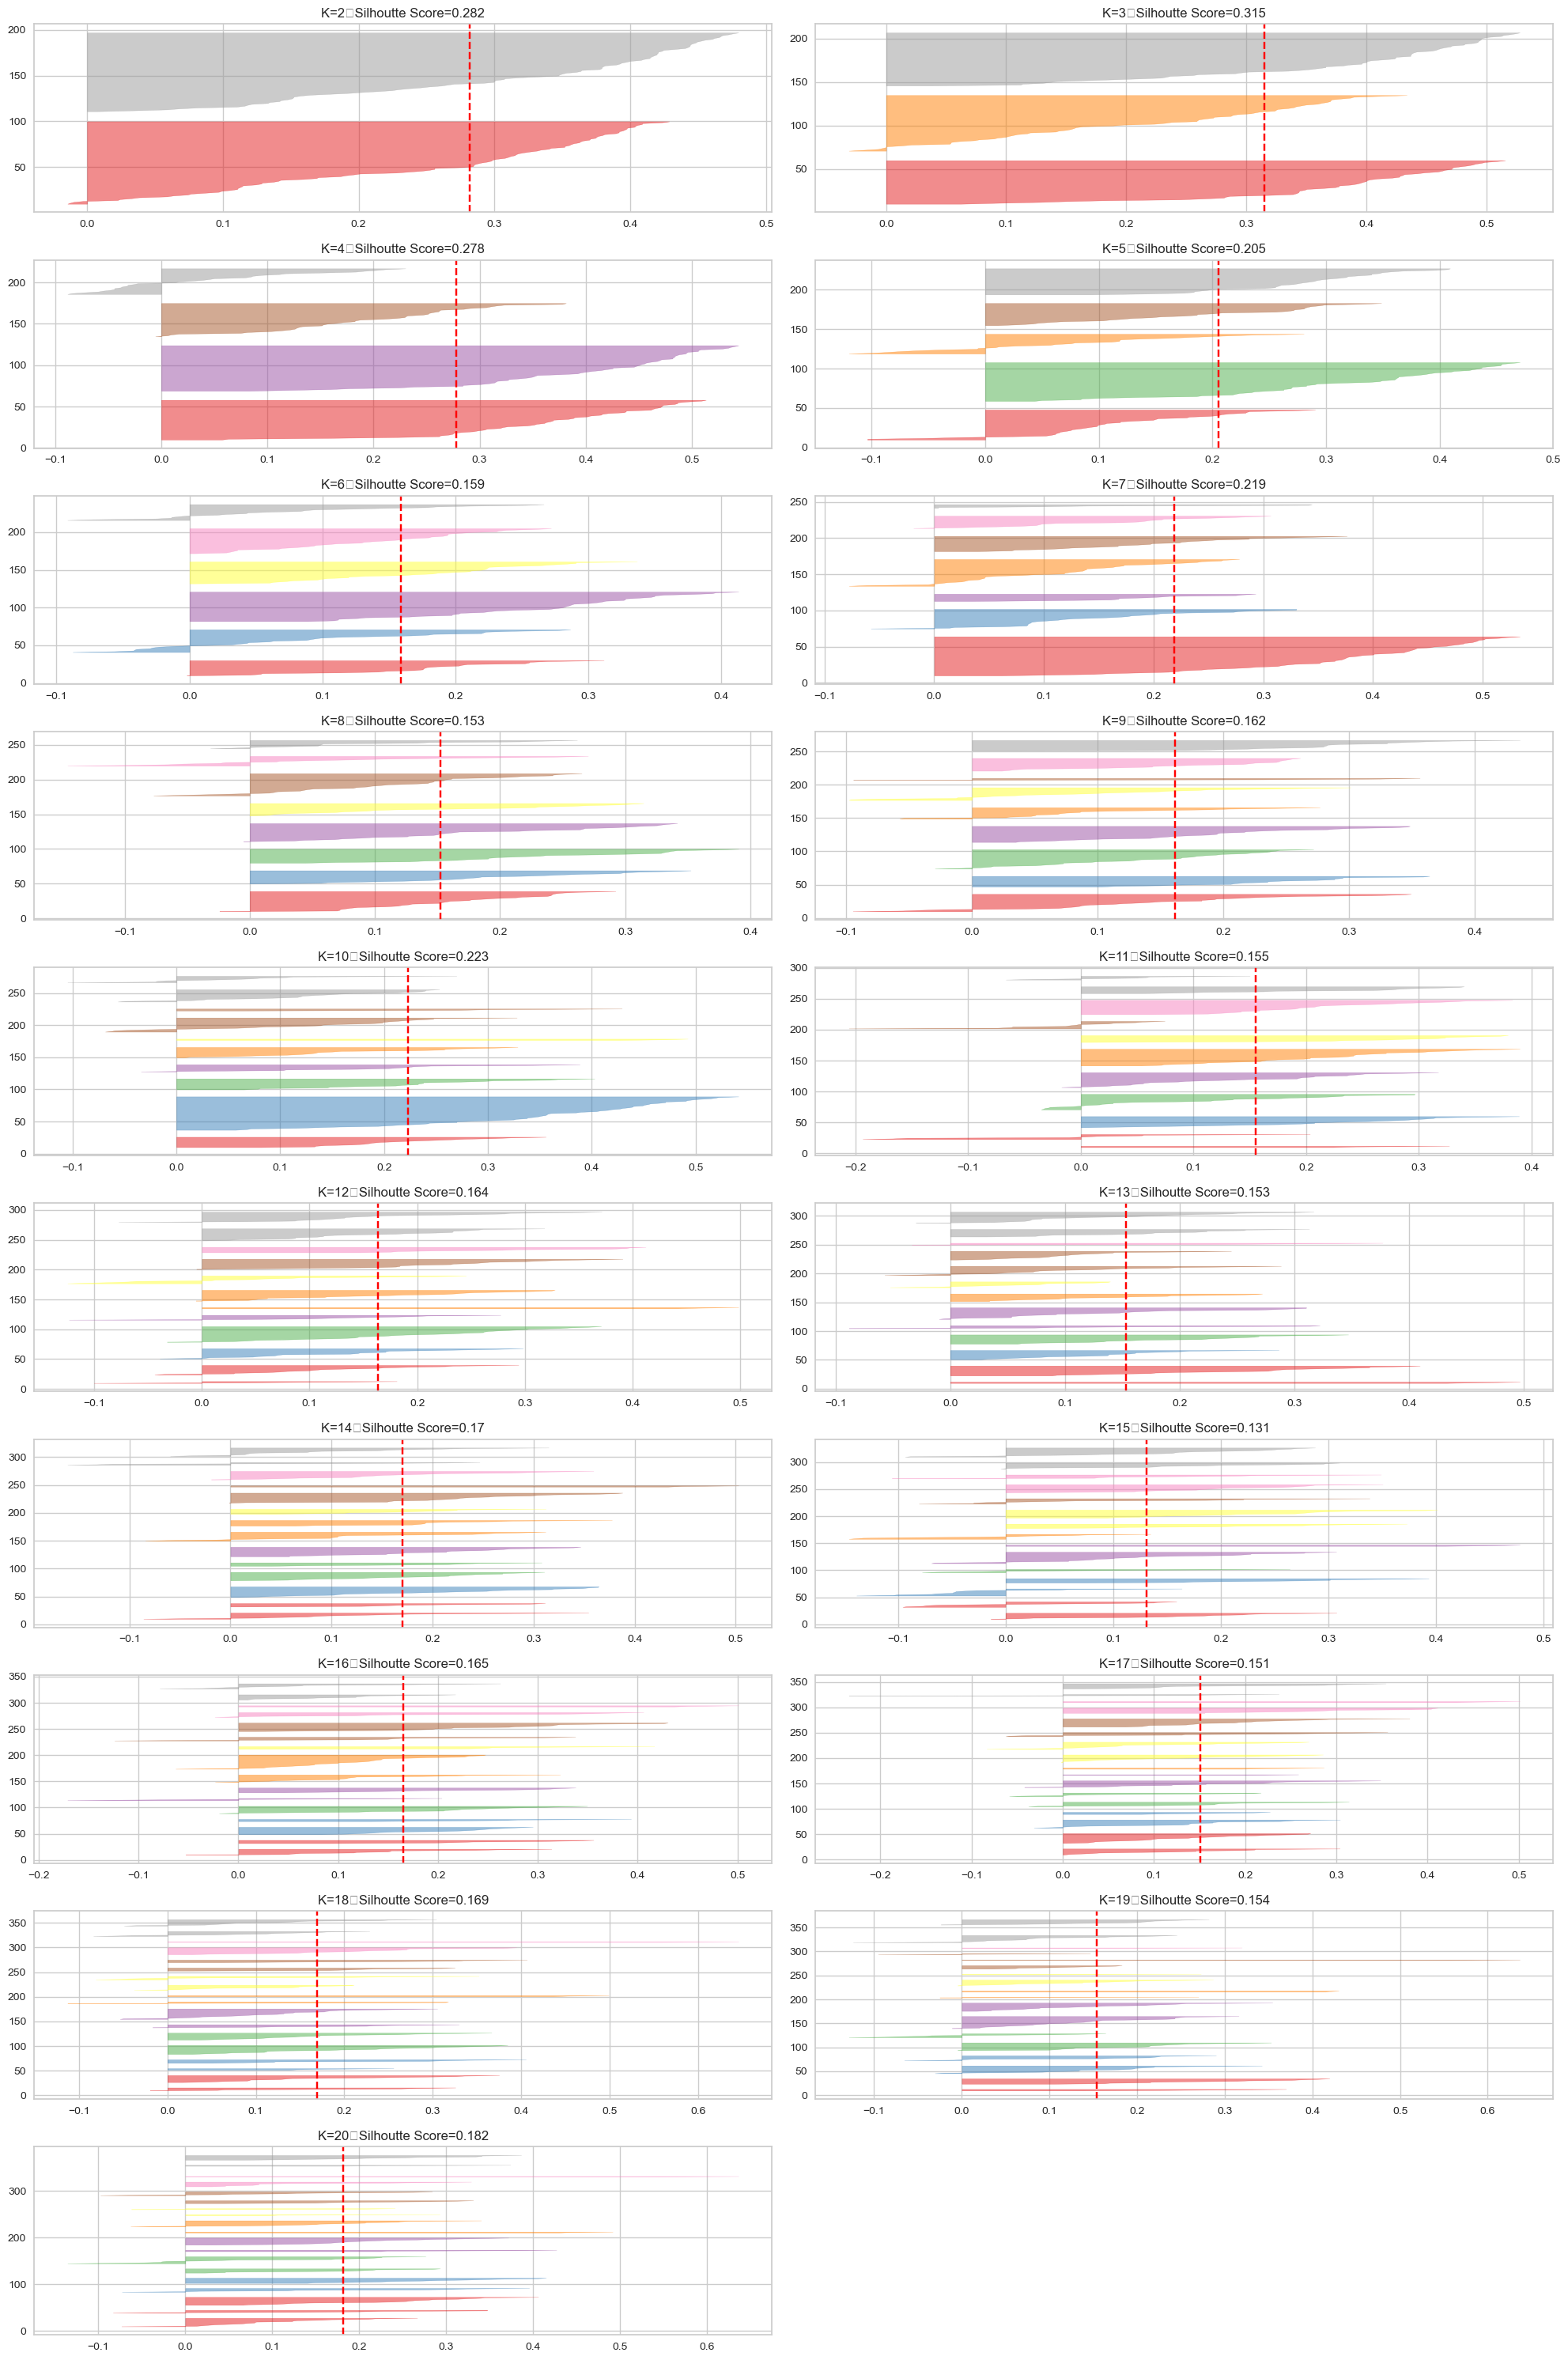

In [21]:
# silhoutte visulaizer
t=1
plt.figure(figsize=(20,30))
for i in range(2,21):
    plt.subplot(10,2,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(estimator=model)
    sil_viz.fit(pca_data)
    plt.title(f'K={i}\tSilhoutte Score={round(sil_viz.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

In [22]:
kmean=KMeans(n_clusters=3)
kmean.fit(pca_data)

KMeans(n_clusters=3)

In [23]:
labels=kmean.predict(pca_data)
data['labels_kmeans']=labels

In [24]:
data['labels_kmeans'].value_counts()

labels_kmeans
0    66
2    63
1    49
Name: count, dtype: int64

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [26]:
data[data['labels_kmeans']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,66.0,13.617121,0.614433,11.56,13.2500,13.725,14.0600,14.83
Malic_Acid,66.0,1.948939,0.684503,0.99,1.6425,1.740,1.9150,4.04
Ash,66.0,2.445152,0.265957,1.75,2.2800,2.435,2.6175,3.23
Ash_Alcanity,66.0,17.542424,3.358345,11.20,16.0000,17.000,18.8750,30.00
Magnesium,66.0,108.409091,14.707379,86.00,98.0000,105.500,116.0000,162.00
Total_Phenols,66.0,2.829848,0.381053,1.85,2.6000,2.825,3.0000,3.88
Flavanoids,66.0,2.968788,0.538552,1.28,2.6800,2.955,3.2475,5.08
Nonflavanoid_Phenols,66.0,0.288636,0.074336,0.14,0.2400,0.285,0.3200,0.50
Proanthocyanins,66.0,1.943182,0.442706,1.25,1.6600,1.935,2.1300,3.28
Color_Intensity,66.0,5.337121,1.344398,2.60,4.3650,5.245,6.1825,8.90


In [27]:
data[data['labels_kmeans']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,49.0,13.151633,0.524898,12.20,12.81,13.16,13.50,14.34
Malic_Acid,49.0,3.344490,1.079136,1.24,2.59,3.27,3.91,5.65
Ash,49.0,2.434694,0.183520,2.10,2.30,2.38,2.60,2.86
Ash_Alcanity,49.0,21.438776,2.239868,17.50,20.00,21.00,23.00,27.00
Magnesium,49.0,99.020408,10.968686,80.00,89.00,97.00,106.00,123.00
Total_Phenols,49.0,1.678163,0.353257,0.98,1.41,1.65,1.80,2.80
Flavanoids,49.0,0.797959,0.312557,0.34,0.58,0.69,0.92,1.59
Nonflavanoid_Phenols,49.0,0.450816,0.125014,0.17,0.40,0.47,0.53,0.63
Proanthocyanins,49.0,1.163061,0.410006,0.55,0.86,1.11,1.35,2.70
Color_Intensity,49.0,7.343265,2.316626,3.85,5.40,7.50,9.20,13.00


In [28]:
data[data['labels_kmeans']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,63.0,12.237302,0.507687,11.03,11.855,12.25,12.47,13.67
Malic_Acid,63.0,1.958095,1.030386,0.74,1.310,1.63,2.28,5.80
Ash,63.0,2.231111,0.292834,1.36,2.000,2.24,2.41,2.92
Ash_Alcanity,63.0,20.028571,2.965959,10.60,18.000,20.00,21.55,28.50
Magnesium,63.0,91.222222,10.406952,70.00,85.000,88.00,98.00,134.00
Total_Phenols,63.0,2.214762,0.507546,1.10,1.905,2.20,2.55,3.50
Flavanoids,63.0,2.002698,0.574485,0.57,1.605,2.03,2.28,3.18
Nonflavanoid_Phenols,63.0,0.369365,0.119608,0.13,0.285,0.37,0.43,0.66
Proanthocyanins,63.0,1.554603,0.567009,0.41,1.345,1.48,1.80,3.58
Color_Intensity,63.0,2.988413,0.854867,1.28,2.475,2.90,3.30,5.75


In [27]:
data.groupby(by='labels_kmeans').mean().T

labels_kmeans,0,1,2
Alcohol,13.676774,13.134118,12.250923
Malic_Acid,1.997903,3.307255,1.897385
Ash,2.466290,2.417647,2.231231
Ash_Alcanity,17.462903,21.241176,20.063077
Magnesium,107.967742,98.666667,92.738462
Total_Phenols,2.847581,1.683922,2.247692
Flavanoids,3.003226,0.818824,2.050000
Nonflavanoid_Phenols,0.292097,0.451961,0.357692
Proanthocyanins,1.922097,1.145882,1.624154
Color_Intensity,5.453548,7.234706,2.973077


In [29]:
data['labels_kmeans']=data['labels_kmeans'].apply(lambda x:'High Quaity' if x==0 else 'Medium Quality' if x==1 else 'Low Quality')

In [30]:
data.groupby(by='labels_kmeans').mean().T

labels_kmeans,High Quaity,Low Quality,Medium Quality
Alcohol,13.617121,12.237302,13.151633
Malic_Acid,1.948939,1.958095,3.344490
Ash,2.445152,2.231111,2.434694
Ash_Alcanity,17.542424,20.028571,21.438776
Magnesium,108.409091,91.222222,99.020408
Total_Phenols,2.829848,2.214762,1.678163
Flavanoids,2.968788,2.002698,0.797959
Nonflavanoid_Phenols,0.288636,0.369365,0.450816
Proanthocyanins,1.943182,1.554603,1.163061
Color_Intensity,5.337121,2.988413,7.343265


In [31]:
centroids=kmean.cluster_centers_

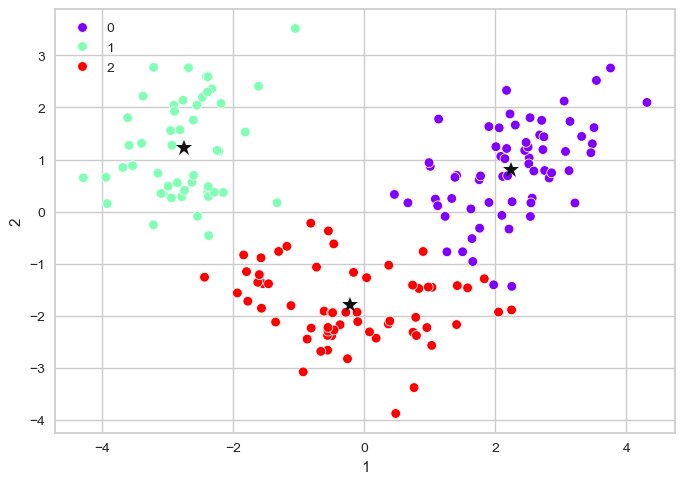

In [32]:
sns.scatterplot(data=pca_data,x=1,y=2,hue=labels,palette='rainbow')
for i in range(0,3):
    plt.plot(centroids[i][0],centroids[i][1],color='k',marker='*',ms=12)

plt.show()

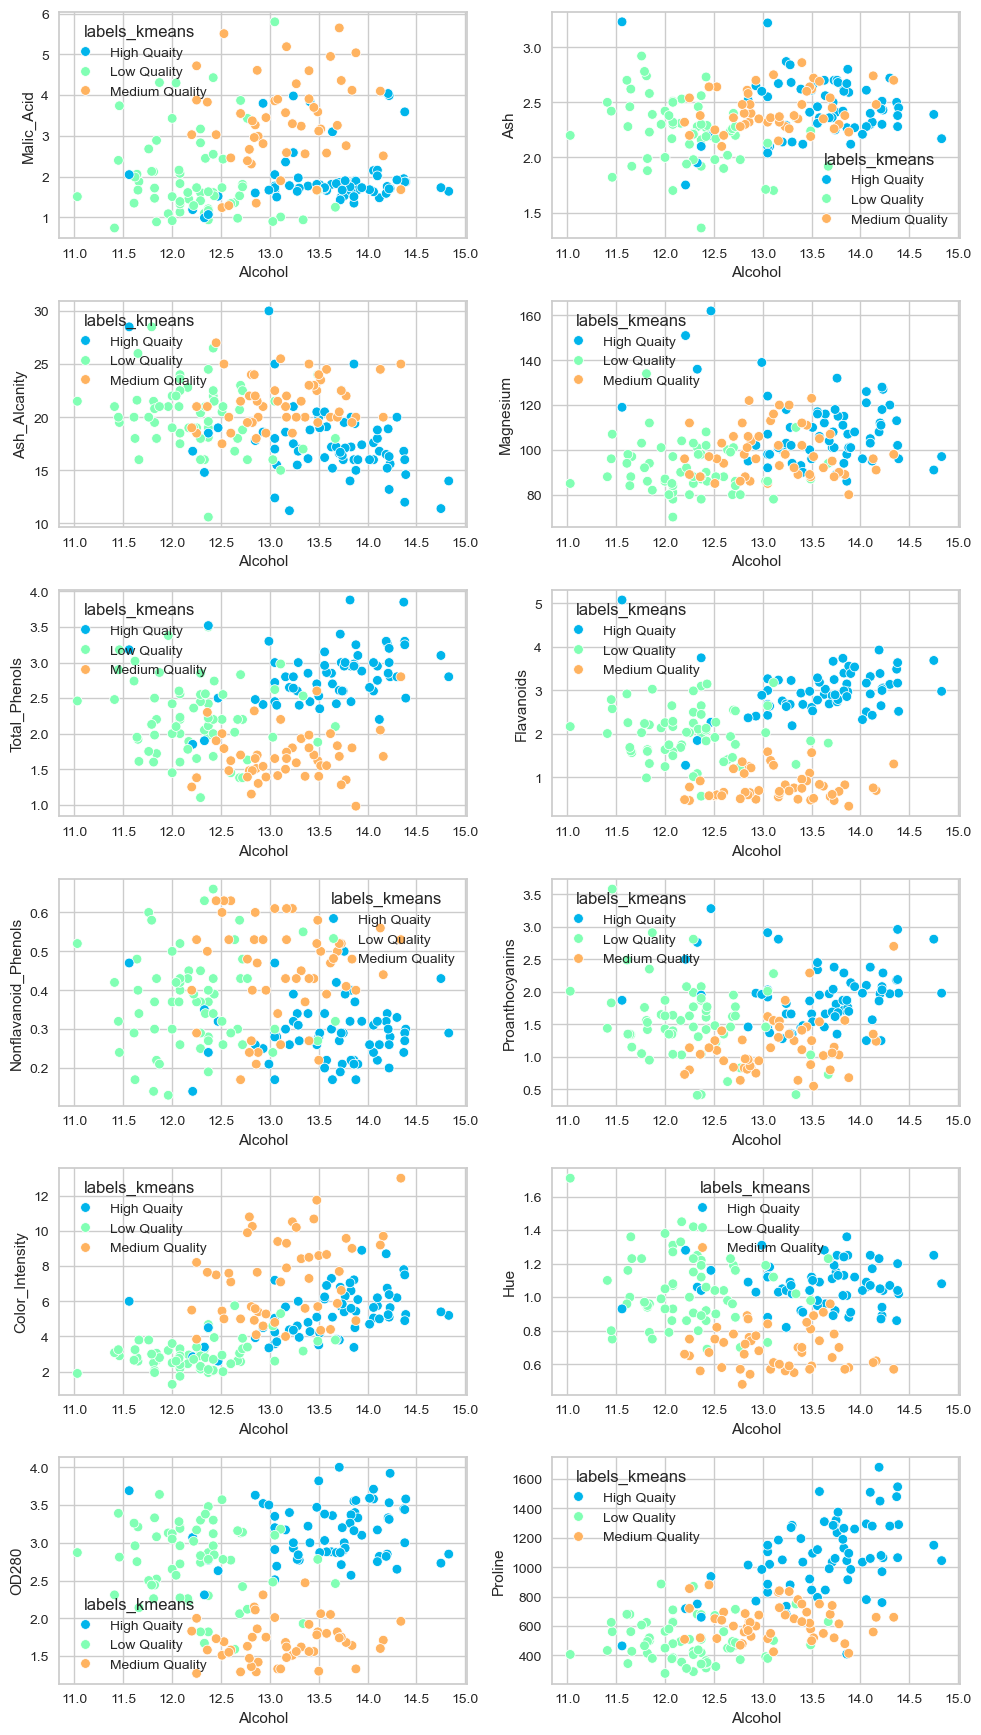

In [33]:
t=1
plt.figure(figsize=(10,20))
for i in data.columns:
    if i not in ['labels_kmeans','Alcohol']:
        plt.subplot(7,2,t)
        sns.scatterplot(data=data,x='Alcohol',y=i,hue='labels_kmeans',palette='rainbow')
        t+=1
plt.tight_layout()
plt.show()

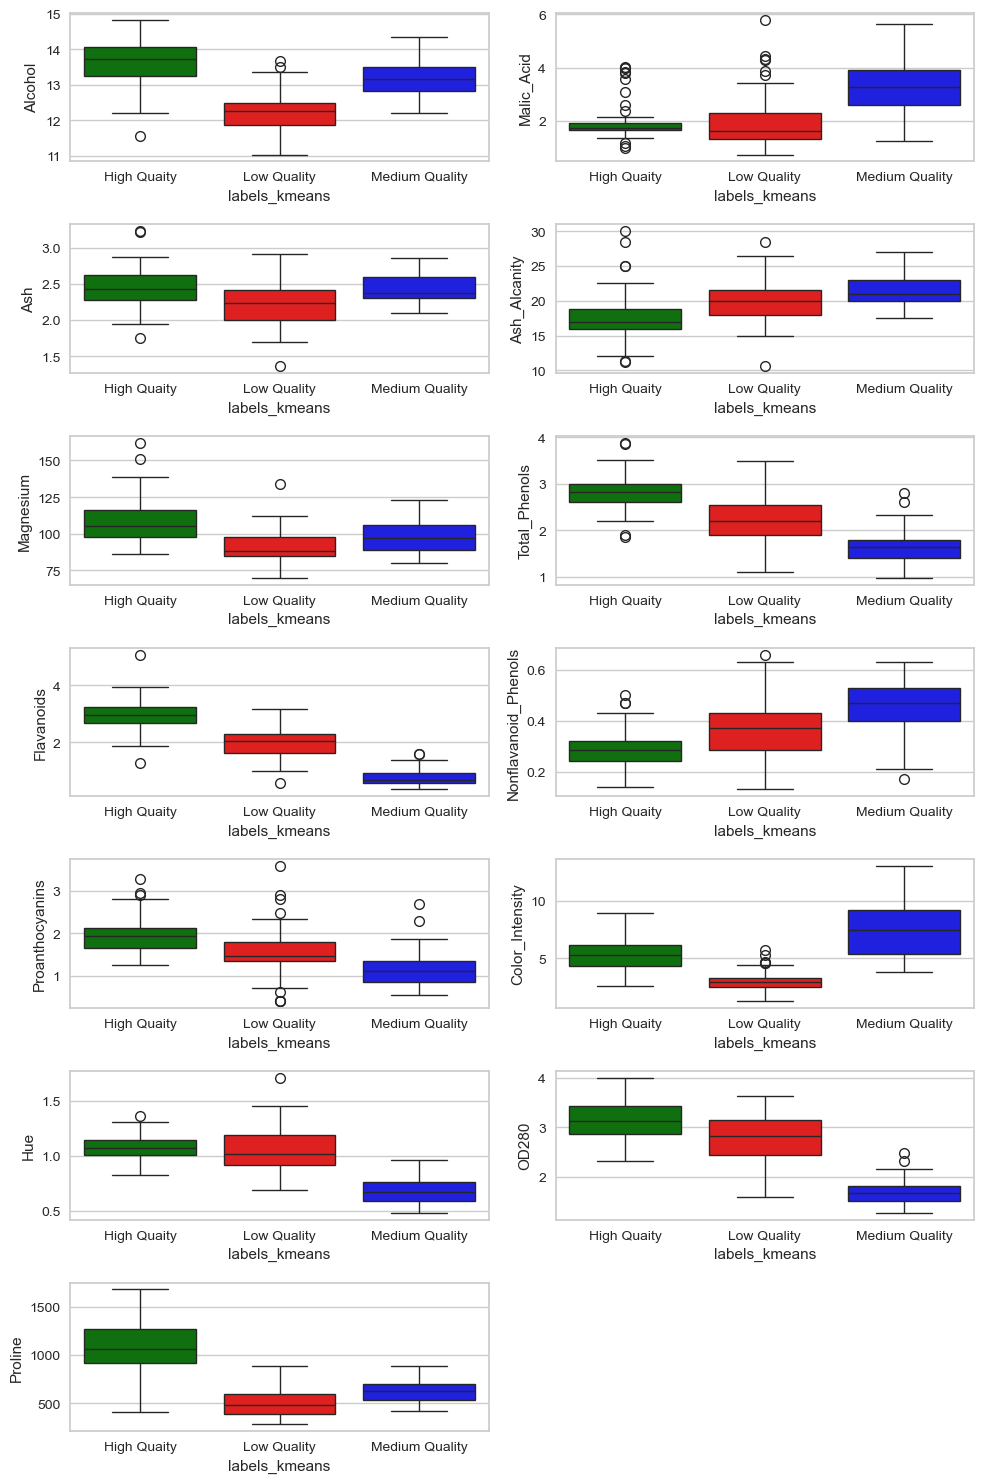

In [34]:
t=1
plt.figure(figsize=(10,15))
for i in data:
    if i!='labels_kmeans':
        plt.subplot(7,2,t)
        sns.boxplot(data=data,y=i,x='labels_kmeans',palette=['green','red','blue'])
    t+=1
plt.tight_layout()
plt.show()

## Agloromative Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [36]:
euc_mat=euclidean_distances(data_s)

In [37]:
link_mat=linkage(data_s,method='ward')

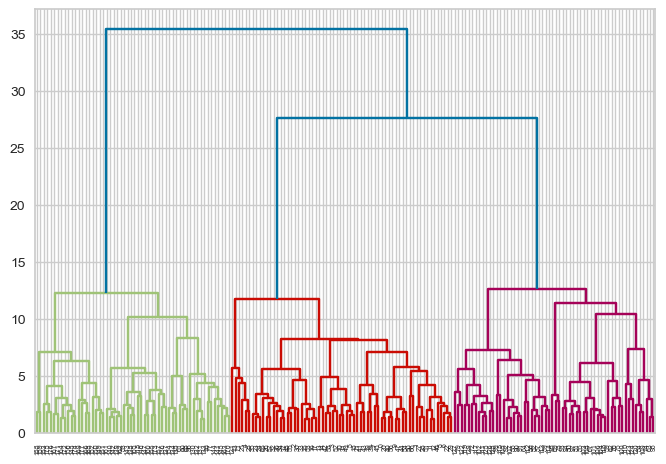

In [38]:
dendrogram(link_mat)
plt.show()

In [39]:
euc_mat.shape

(178, 178)

In [40]:
actual_dist=euc_mat[np.triu_indices(178,k=1)]
actual_dist

array([3.49753522, 3.02660794, 2.84250465, ..., 1.82621785, 3.39251526,
       3.32427633])

In [41]:
cophenet(link_mat,actual_dist)[0]

0.6623487206613261

In [42]:
ccc,cophenetic_dist=cophenet(link_mat,actual_dist)

In [43]:
ccc

0.6623487206613261

In [44]:
np.corrcoef(actual_dist,cophenetic_dist)

array([[1.        , 0.66234872],
       [0.66234872, 1.        ]])

In [45]:
model_agg=AgglomerativeClustering(n_clusters=3)
labels_agg=model_agg.fit_predict(data_s)

In [46]:
silhouette_score(data_s,labels_agg)

0.2774439826952265

In [47]:
silhouette_score(data_s,labels)

0.28100618672557653

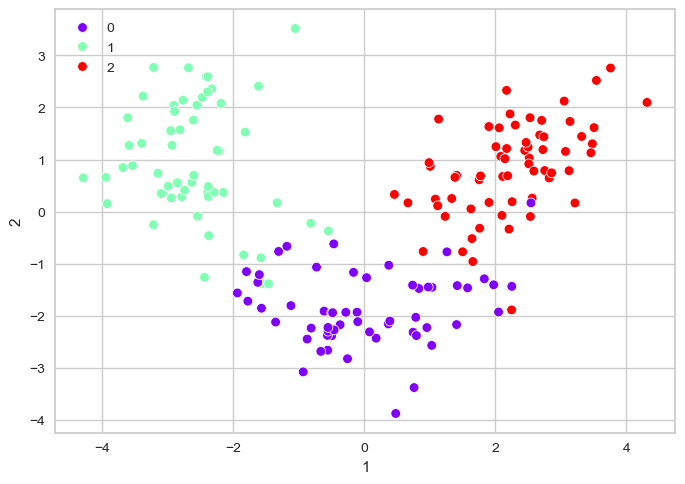

In [49]:
sns.scatterplot(data=pca_data,x=1,y=2,hue=labels_agg,palette='rainbow')
plt.show()